In [1]:
### Keras Bidirectional LSTM

# https://github.com/snehalnair/Named-Entity-Recognition/blob/master/NER.ipynb
# https://towardsdatascience.com/named-entity-recognition-ner-using-keras-bidirectional-lstm-28cd3f301f54

# https://medium.com/analytics-vidhya/ner-tensorflow-2-2-0-9f10dcf5a0a

In [2]:
import os
import pandas as pd
import glob
import csv
import numpy as np

In [6]:
sourcepath='./Biomedical_corpora/corpora/NER/CoNLL/BIO/AnatEM_BIO/'
tsvpath=sourcepath+'*.tsv'

all_files = glob.glob(os.path.join(sourcepath, "*.tsv"))    
print(all_files)

sent_list=[]
tag_list=[]
split_label=[]
split_tags=[]

count=0
for i in all_files:
    with open(i) as tsvfile:
        tsvreader = csv.reader(tsvfile, delimiter="\t")
        
        for index,line in enumerate(tsvreader):
            if not line:
                split_label.append(['sentence'+str(count)]+sent_list)
                split_tags.append(['sentence'+str(count)]+tag_list)
                sent_list=[]
                tag_list=[]
                count=count+1
                continue
#             sent_list.append(line[0])
            sent_list.append(line[0])
            tag_list.append(line[-1].rstrip("\n"))
                
        
    

['./Biomedical_corpora/corpora/NER/CoNLL/BIO/AnatEM_BIO\\test.tsv', './Biomedical_corpora/corpora/NER/CoNLL/BIO/AnatEM_BIO\\train.tsv', './Biomedical_corpora/corpora/NER/CoNLL/BIO/AnatEM_BIO\\valid.tsv']


In [4]:
dframe=pd.DataFrame(zip([i[0] for i in split_label],[i[1:] for i in split_label],[i[1:] for i in split_tags]),columns=['Sentence #','Sentence','Tag'])

In [5]:
# dframe.to_csv('C:/Users/X232747/PycharmProjects/Biomedical_corpora/Biomedical-Corpora-master/corpora/NER/CoNLL/BIO/AnatEM_BIO/AnatEm_sentence_BIO.csv')
# dframe

In [5]:
tag_df=dframe.set_index(['Sentence #']).apply(pd.Series.explode).reset_index()
tag_df['Tag'].unique()

array(['O', 'B-Anatomical_system', 'I-Anatomical_system', 'B-Cell',
       'I-Cell', 'B-Cellular_component', 'B-Organ',
       'B-Organism_substance', 'I-Cellular_component', 'B-Cancer',
       'I-Cancer', 'B-Developing_anatomical_structure',
       'I-Developing_anatomical_structure', 'I-Organism_substance',
       'B-Tissue', 'B-Multi-tissue_structure', 'I-Multi-tissue_structure',
       'B-Immaterial_anatomical_entity', 'I-Tissue',
       'B-Organism_subdivision', 'B-Pathological_formation',
       'I-Pathological_formation', 'I-Immaterial_anatomical_entity',
       'I-Organ', 'I-Organism_subdivision'], dtype=object)

In [6]:
# tag_df.to_csv('C:/Users/X232747/PycharmProjects/Biomedical_corpora/Biomedical-Corpora-master/corpora/NER/CoNLL/BIO/AnatEM_BIO/AnatEM_BIO_tokens.csv')

In [6]:
from itertools import chain
def get_dict_map(data, token_or_tag):
    tok2idx = {}
    idx2tok = {}
    
    if token_or_tag == 'token':
        vocab = list(set(data['Sentence'].to_list()))
    else:
        vocab = list(data['Tag'].unique())
        print(vocab)
    idx2tok = {idx:tok for  idx, tok in enumerate(vocab)}
    tok2idx = {tok:idx for  idx, tok in enumerate(vocab)}
    return tok2idx, idx2tok


token2idx, idx2token = get_dict_map(tag_df, 'token')
tag2idx, idx2tag = get_dict_map(tag_df, 'tag')


['O', 'B-Anatomical_system', 'I-Anatomical_system', 'B-Cell', 'I-Cell', 'B-Cellular_component', 'B-Organ', 'B-Organism_substance', 'I-Cellular_component', 'B-Cancer', 'I-Cancer', 'B-Developing_anatomical_structure', 'I-Developing_anatomical_structure', 'I-Organism_substance', 'B-Tissue', 'B-Multi-tissue_structure', 'I-Multi-tissue_structure', 'B-Immaterial_anatomical_entity', 'I-Tissue', 'B-Organism_subdivision', 'B-Pathological_formation', 'I-Pathological_formation', 'I-Immaterial_anatomical_entity', 'I-Organ', 'I-Organism_subdivision']


In [7]:
token2idx
tag_df['Word_idx'] = tag_df['Sentence'].map(token2idx)
tag_df['Tag_idx'] = tag_df['Tag'].map(tag2idx) 

In [8]:
tag_df.tail()

,Sentence #,Sentence,Tag,Word_idx,Tag_idx
312161,sentence11808,curtail,O,9546,0
312162,sentence11808,aberrant,O,14923,0
312163,sentence11808,EC,B-Cell,8082,3
312164,sentence11808,growth,O,3385,0
312165,sentence11808,.,O,18853,0


In [10]:
tag_df.isna().any()

Sentence #    False
Sentence      False
Tag           False
Word_idx      False
Tag_idx       False
dtype: bool

In [9]:
tag_df_fillna = tag_df.fillna(method='ffill', axis=0)
tag_df_group = tag_df_fillna.groupby(['Sentence #'],as_index=False
                                )['Sentence', 'Tag', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))

tag_df_group.head()

<ipython-input-9-db8cc5684c2d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tag_df_group = tag_df_fillna.groupby(['Sentence #'],as_index=False


,Sentence #,Sentence,Tag,Word_idx,Tag_idx
0,sentence0,[SUMMARY],[O],[8426],[0]
1,sentence1,"[Both, the, innate, and, adaptive, immune, sub...","[O, O, O, O, O, B-Anatomical_system, I-Anatomi...","[5802, 18229, 1835, 6283, 12096, 1191, 14031, ...","[0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,sentence10,"[On, the, 8th, day, of, serum, -, free, cultur...","[O, O, O, O, O, B-Organism_substance, O, O, O,...","[16984, 18229, 9542, 4879, 11455, 17780, 5395,...","[0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,sentence100,"[The, pre, -, publication, history, for, this,...","[O, O, O, O, O, O, O, O, O, O, O, O, O]","[1661, 10799, 5395, 1791, 3313, 1239, 15154, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,sentence1000,"[The, vertebrate, vasculature, develops, in, r...","[O, O, B-Anatomical_system, O, O, O, O, O, O, ...","[1661, 15294, 15226, 17821, 17658, 9712, 8944,...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [10]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


In [11]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

assert tf.config.list_physical_devices('GPU')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7921477763730249295
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3044750132
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14572629349709866672
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [12]:
def get_pad_train_test_val(data_group, data):
    n_token = len(list(set(data['Sentence'].to_list())))
    n_tag = len(list(set(data['Tag'].to_list())))
    
    tokens = data_group['Word_idx'].tolist()
    maxlen = max([len(s) for s in tokens])
    pad_tokens = pad_sequences(tokens, maxlen=maxlen, dtype='int32', padding='post', value= n_token - 1)
    
    tags = data_group['Tag_idx'].tolist()
    pad_tags = pad_sequences(tags, maxlen=maxlen, dtype='int32', padding='post', value= tag2idx["O"])
    
    n_tags = len(tag2idx)
    pad_tags = [to_categorical(i, num_classes=n_tags) for i in pad_tags]
    
    
    train_tokens, test_tokens, train_tags, test_tags = train_test_split(pad_tokens, pad_tags, test_size=0.1, train_size=0.9, random_state=2020)

    print(
        'train_tokens length:', len(train_tokens),
        '\ntest_tokens length:', len(test_tokens),
        '\ntrain_tags:', len(train_tags),
        '\ntest_tags:', len(test_tags)
    )
    
    return train_tokens, test_tokens, train_tags, test_tags

train_tokens, test_tokens, train_tags, test_tags = get_pad_train_test_val(tag_df_group, tag_df)

train_tokens length: 10628 
test_tokens length: 1181 
train_tags: 10628 
test_tags: 1181


In [13]:
for token, tag in zip(train_tokens[0], train_tags[0]):
    print('%s\t%s' % (token, tag))
    break

95	[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [14]:
import numpy as np
import tensorflow
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras.utils import plot_model


In [15]:
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)

In [16]:
input_dim = len(list(set(tag_df['Sentence'].to_list())))+1
output_dim = 32
input_length = max([len(s) for s in tag_df_group['Word_idx'].tolist()])
n_tags = len(tag2idx)
print('input_dim: ', input_dim, '\noutput_dim: ', output_dim, '\ninput_length: ', input_length, '\nn_tags: ', n_tags)

input_dim:  20162 
output_dim:  32 
input_length:  334 
n_tags:  25


In [17]:
def get_bilstm_lstm_model():
    model = Sequential()

    # Add Embedding layer
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))

    # Add bidirectional LSTM
    model.add(Bidirectional(LSTM(units=output_dim, return_sequences=True, dropout=0.2, recurrent_dropout=0.2), merge_mode = 'concat'))

    # Add LSTM
    #     model.add(LSTM(units=output_dim, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))

    # Add timeDistributed Layer
    model.add(TimeDistributed(Dense(n_tags, activation="tanh")))

    #Optimiser 
#     adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    
    return model

In [18]:
def train_model(X, y, model):
    loss = list()

        # fit model for one epoch on this sequence
    hist = model.fit(X, y, batch_size=100, verbose=1, epochs=4, validation_split=0.2)
    loss.append(hist.history['loss'][0])
    return loss
model_bilstm_lstm = get_bilstm_lstm_model()
plot_model(model_bilstm_lstm)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 334, 32)           645184    
_________________________________________________________________
bidirectional (Bidirectional (None, 334, 64)           16640     
_________________________________________________________________
time_distributed (TimeDistri (None, 334, 25)           1625      
Total params: 663,449
Trainable params: 663,449
Non-trainable params: 0
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [19]:
np.shape(train_tokens)
np.shape(train_tags[0])


(334, 25)

In [20]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Num GPUs Available:  1
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5



In [30]:
import keras

import tensorflow as tf
from tensorflow.python.keras import backend as K
K.set_session(sess)
# keras.backend.set_session(sess)

In [31]:
results = pd.DataFrame()
results['with_add_lstm'] = train_model(train_tokens, np.array(train_tags), model_bilstm_lstm)

Epoch 1/4
86/86 [==============================] - 611s 7s/step - loss: 12.1697 - accuracy: 0.8658 - val_loss: 16.0448 - val_accuracy: 0.9941
Epoch 2/4
86/86 [==============================] - 608s 7s/step - loss: 16.0424 - accuracy: 0.9941 - val_loss: 16.0423 - val_accuracy: 0.9941
Epoch 3/4
86/86 [==============================] - 620s 7s/step - loss: 16.0404 - accuracy: 0.9941 - val_loss: 16.0407 - val_accuracy: 0.9941
Epoch 4/4
86/86 [==============================] - 628s 7s/step - loss: 16.0387 - accuracy: 0.9941 - val_loss: 16.0392 - val_accuracy: 0.9941


In [32]:
results

,with_add_lstm
0,12.169669


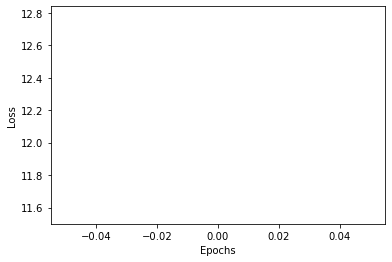

In [33]:
# # !pip install matplotlib 
import matplotlib.pyplot as plt
plt.plot(results['with_add_lstm'])
plt.xlabel('Epochs');
plt.ylabel('Loss');